### London Airbnb 

- ***STEP***
- ***1. Data Cleaning***
- Remove duplicates,Missing Value Analysis,Inspect where data is missing.Decide:drop/ impute/ leave.
- ***2. EDA (Exploratory Data Analysis)***
- Look at natural distributions (histograms, boxplots, counts),spread, outliers, correlations.
- ***3. Feature Engineering*** 
- Creating derived columns/Engineered columns that might be usefull in upcoming KPIs. 
- ***4. KPI Calculation***
- KPIs/insights are calculated on the cleaned + engineered dataset/columns.
- ***5. Hypothesis Testing***
- to validate assumptions
- ***KPI AND Hypothesis Tesing are present in the next notebook.***

In [59]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.max_columns", None)   # show all columns
pd.set_option("display.width", 200) 

In [2]:
# Load and combining all 4 files -These files have london airbnb listing of 3rd and 4th quarter of 2024 and 1st and 2nd quarter of 2025
df1 = pd.read_csv("London_6_sep_2024_listings.csv")
df2 = pd.read_csv("London_11_December_2024_listings.csv")
df3 = pd.read_csv("London_4_March_2025_listings.csv")
df4 = pd.read_csv("London_10_June_2025_listings.csv")

#  (quarter labels)- since a listing can appear in every quarter for analysis, making additional column that marks quarter to which listing belongs.
df1["quarter"] = "2024Q3"
df2["quarter"] = "2024Q4"
df3["quarter"] = "2025Q1"
df4["quarter"] = "2025Q2"

# Combine all 4
combined = pd.concat([df1, df2, df3, df4], ignore_index=True)

# Save combined dataset to CSV
# combined.to_csv("London_listings_Jul2024_Jun2025_combined.csv", index=False)

In [3]:
London_airbnb = pd.read_csv("London_listings_Jul2024_Jun2025_combined.csv")
London_airbnb.head(4)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,quarter,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d
0,13913,https://www.airbnb.com/rooms/13913,2.024090e+13,06-09-2024,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,16-11-2009,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within an hour,100%,77%,t,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",t,t,Neighborhood highlights,Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Refrigerator"", ""Body soap"", ""Outlet covers"",...",$59.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,28,58,88,363,06-09-2024,44,4,0,18-08-2010,10-07-2024,4.82,4.74,4.74,4.77,4.84,4.72,4.72,NaN,f,3,2,1,0,0.26,2024Q3,NaN,NaN,NaN,NaN
1,15400,https://www.airbnb.com/rooms/15400,2.024090e+13,07-09-2024,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,05-12-2009,"Royal Borough of Kensington and Chelsea, Unite...","English, grandmother, I have travelled quite ...",NaN,NaN,100%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Kensington and Chelsea,NaN,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Carbon mo...",$120.00,4,30,4.0,4.0,30.0,30.0,4.0,30.0,NaN,t,0,0,0,244,07-09-2024,96,2,0,21-12-2009,28-04-2024,4.80,4.86,4.88,4.88,4.84,4.93,4.75,NaN,f,1,1,0,0,0.54,2024Q3,NaN,NaN,NaN,NaN
2,17402,https://www.airbnb.com/rooms/17402,2.024090e+13,07-09-2024,city scrape,Fab 3-Bed/2 Bath & Wifi: Trendy W1,"You'll have a great time in this beautiful, cl...","Fitzrovia is a very desirable trendy, arty and...",https://a0.muscache.com/pictures/39d5309d-fba7...,67564,https://www.airbnb.com/users/show/67564,Liz,04-01-2010,"London, United Kingdom",We are Liz and Jack. We manage a number of ho...,within an hour,100%,94%,t,https://a0.muscache.com/im/users/67564/profile...,https://a0.muscache.com/im/users/67564/profile...,Fitzrovia,7.0,32.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Westminster,NaN,51.52195,-0.14094,Entire rental unit,Entire home/apt,6,2.0,2 baths,3.0,3.0,"[""Refrigerator"", ""Bathtub"", 

In [4]:
# Keeeping in mind KPI's to generate, here are column that certainly won't be needed, so dropping.
london_airbnb_dataset=London_airbnb.drop(["listing_url","scrape_id","last_scraped","source","name","description","neighborhood_overview","picture_url","host_url","host_name","host_about","host_thumbnail_url","host_picture_url","host_verifications","host_location","host_neighbourhood","host_has_profile_pic",
"neighbourhood","license","neighbourhood_group_cleansed","minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights","calendar_updated","calendar_last_scraped"],axis=1)
# Save to Excel
# london_airbnb_dataset.to_excel("London_Airbnb_Cleaned.xlsx", index=False)

In [5]:
London_airbnb=pd.read_excel("London_Airbnb_Cleaned.xlsx")
London_airbnb.head()
London_airbnb.shape
London_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382536 entries, 0 to 382535
Data columns (total 55 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   id                                            382536 non-null  int64  
 1   host_id                                       382536 non-null  int64  
 2   host_since                                    382429 non-null  object 
 3   host_response_time                            251053 non-null  object 
 4   host_response_rate                            251053 non-null  object 
 5   host_acceptance_rate                          273245 non-null  object 
 6   host_is_superhost                             375710 non-null  object 
 7   host_listings_count                           382429 non-null  float64
 8   host_total_listings_count                     382429 non-null  float64
 9   host_identity_verified                        38

In [6]:
# Displaying columns with categorical missing values 
missing=(London_airbnb.isnull().sum()/len(London_airbnb))*100
missing_object = missing[London_airbnb[missing.index].dtypes == "object"]
print(missing_object.count())
print(missing_object)

17
host_since                 0.027971
host_response_time        34.371406
host_response_rate        34.371406
host_acceptance_rate      28.570122
host_is_superhost          1.784407
host_identity_verified     0.027971
neighbourhood_cleansed     0.000000
property_type              0.000000
room_type                  0.000000
bathrooms_text             0.161815
amenities                  0.000000
price                     34.906257
has_availability           4.595907
first_review              25.755223
last_review               25.755223
instant_bookable           0.000000
quarter                    0.000000
dtype: float64


In [7]:
# Displaying columns with float64 or numerical dtype columns
missing_int = missing[London_airbnb[missing.index].dtypes == "float64"]
print(missing_int.count())
print(missing_int)

22
host_listings_count             0.027971
host_total_listings_count       0.027971
latitude                        0.000000
longitude                       0.000000
bathrooms                      34.925340
bedrooms                       13.179675
beds                           34.989387
maximum_maximum_nights          0.002091
minimum_nights_avg_ntm          0.002091
maximum_nights_avg_ntm          0.002091
review_scores_rating           25.755223
review_scores_accuracy         25.771953
review_scores_cleanliness      25.764895
review_scores_checkin          25.803062
review_scores_communication    25.778227
review_scores_location         25.804369
review_scores_value            25.804107
reviews_per_month              25.755223
availability_eoy               50.015162
number_of_reviews_ly           50.015162
estimated_occupancy_l365d      50.015162
estimated_revenue_l365d        67.839628
dtype: float64


Analysing ***"host_listings_count", "host_total_listings_count"*** 
- Both have same percentage of missing values(0.02791).
- Here missingness itself is indicative of something maybe Analytical value → “some hosts are anonymized / hidden”, which could be interesting to highlight or
Some hosts don’t provide full profiles or Airbnb anonymized/deleted host details .
- But the missing value %  is 0.027971 which is very small.We can simply impute it using -1 .

In [ ]:

# Check missingness
print("Missing values:")
print(London_airbnb[["host_listings_count", "host_total_listings_count"]].isna().sum())

#Compare equality row by row
London_airbnb["same_counts"] = London_airbnb["host_listings_count"] == London_airbnb["host_total_listings_count"]

# % of rows where both columns are identical
pct_same = London_airbnb["same_counts"].mean() * 100
print(f"\n{pct_same:.2f}% of rows have identical values.")

# Inspect rows where they differ
diffs = London_airbnb[London_airbnb["host_listings_count"] != London_airbnb["host_total_listings_count"]]
print(f"\nNumber of rows where counts differ: {len(diffs)}")

#  examples of differences
print("\nSample differences:")
print(diffs[["id", "host_id", "host_listings_count", "host_total_listings_count"]].head(10))

# Correlation check
corr = London_airbnb[["host_listings_count", "host_total_listings_count"]].corr()
print("\nCorrelation matrix:")
print(corr)


Missing values:
host_listings_count          107
host_total_listings_count    107
dtype: int64

49.84% of rows have identical values.

Number of rows where counts differ: 191892

Sample differences:
        id  host_id  host_listings_count  host_total_listings_count
0    13913    54730                  3.0                        4.0
2    17402    67564                  7.0                       32.0
3    24328    41759                  1.0                        3.0
7   127652   134938                  2.0                        3.0
10  137581   471088                  1.0                        2.0
11  137907    67564                  7.0                       32.0
12   36274   133271                  9.0                      108.0
14   36660   157884                  2.0                        4.0
16   38950   167107                  3.0                        5.0
21  143028   694198                  3.0                        5.0

Correlation matrix:
                           host_

Both columns go missing together (likely host info not available for those listings).
→ Only about half the listings have the same values in both columns.
→ So they are not redundant — they carry different signals.
They are strongly related, but not identical.
Considering missing itself is a signal.
Imputing with Nan

In [15]:
London_airbnb["host_total_listings_count"] = London_airbnb["host_total_listings_count"].isna().astype(int)
London_airbnb["host_listings_count"] = London_airbnb["host_listings_count"].fillna(-1)

## Analysing ***["bathrooms"]*** missingness

***["bathrooms"] has 34.925340 % missing values , can't be simply dropped as this will cause loss of 34% data.***

- The column named ["bathrooms_text"] beside bathrooms has mentioned count in categorical way.
- This could help in imputing some missing value in ["bathrooms"] column.
- (e.g if [bathroom_text]="1 bath" ,then [bathrooms]="1")
- missing values in ["bathrooms"] = Number mentioned in ["bathrooms_text"] column



In [8]:
London_airbnb["bathrooms"] = pd.to_numeric(London_airbnb["bathrooms"], errors="coerce")

# Function to extract number of bathrooms from bathrooms_text
def parse_bathrooms(text):
    if pd.isna(text):
        return np.nan

    s = str(text).lower()

    # Try to capture numbers like "1", "1.5", "2.5"
    m = re.search(r'(\d+(\.\d+)?)', s)
    if m:
        return float(m.group(1))

# Apply parsing, but only fill where bathrooms is NaN
mask_missing = London_airbnb["bathrooms"].isna()
London_airbnb.loc[mask_missing, "bathrooms"] = (
    London_airbnb.loc[mask_missing, "bathrooms_text"].apply(parse_bathrooms)
)



In [9]:
missing2=(London_airbnb['bathrooms'].isnull().sum()/len(London_airbnb))*100
print(missing2)


0.32179977832151746


In [ ]:
#also dropping of [bathroom_text] as its no more needed
London_airbnb.drop('bathrooms_text',axis=1)

***After using column ["bathrooms_text"] to impute missing values in  ["bathrooms"] .***

The missing percentage value came from 32% to 0.32 

This happened because ["bathrooms_text"] column also has nan for handfull rows .

So to impute the remaining  0.32 % values(also it's a very less percentage) ,a possible way could be to use median to impute values.

In [11]:
London_airbnb["bathrooms"] = London_airbnb["bathrooms"].fillna(London_airbnb["bathrooms"].median())
# checking missing value percentage to assure all nan values are imputed
missing2=(London_airbnb['bathrooms'].isnull().sum()/len(London_airbnb))*100
print(missing2) 

0.0


## ***Analysing ["bedrooms"] and ["beds"] missingness***

Step 1: Check Overlap (Together)
- ["bedrooms", "beds"] are related features (all describe property size).
- Often, when one is missing, the others may also be missing (e.g., a host didn’t fill in property details).
- First, let's check how much overlap there is:

In [12]:
# Create a mask where both are missing
mask_both_missing = London_airbnb["bedrooms"].isna() & London_airbnb["beds"].isna()

# Count them
count_both_missing = mask_both_missing.sum()
print("Rows with both bedrooms and beds missing:", count_both_missing)

Rows with both bedrooms and beds missing: 49972


- Since both have missing values and its a huge number .If those rows are dropped we'll loose data.
- A reliable method could be using accomodates column 
- ***accomodates-maximum number of guests the unique listing_id can host***
- Also ["accommodates"] has no null values as stated in below cell.

In [13]:
sum1=London_airbnb["accommodates"].isnull().sum()
print(sum1)

0


In [14]:
mask = London_airbnb["bedrooms"].notna() & London_airbnb["beds"].notna()
df_non_missing = London_airbnb.loc[mask, ["accommodates", "bedrooms", "beds"]]

print("Median accommodates per bedroom:", (df_non_missing["accommodates"] / df_non_missing["bedrooms"]).median())
print("Median beds per bedroom:", (df_non_missing["beds"] / df_non_missing["bedrooms"]).median())

Median accommodates per bedroom: 2.0
Median beds per bedroom: 1.0


Based on median values we can estimate 
* If bedrooms missing → bedrooms ≈ accommodates / 2.
* If beds missing → beds ≈ bedrooms × 1.5.
* If both missing → use accommodates directly:
* bedrooms = accommodates / 2
* beds = accommodates.

In [15]:
# Mask rows where both are missing
mask_both_missing = London_airbnb["bedrooms"].isna() & London_airbnb["beds"].isna()

# Impute bedrooms = accommodates / 2 (rounded to nearest int, at least 1)
London_airbnb.loc[mask_both_missing, "bedrooms"] = (
    (London_airbnb.loc[mask_both_missing, "accommodates"] / 2).round().clip(lower=1)
)

# Impute beds = accommodates (at least 1)
London_airbnb.loc[mask_both_missing, "beds"] = (
    London_airbnb.loc[mask_both_missing, "accommodates"].clip(lower=1)
)

mask_both_missing1 = London_airbnb["bedrooms"].isna() & London_airbnb["beds"].isna()
count_both_missing1 = mask_both_missing1.sum()
count_both_missing1

# Check how many still missing
print("Remaining NaNs in bedrooms:", London_airbnb["bedrooms"].isna().sum())
print("Remaining NaNs in beds:", London_airbnb["beds"].isna().sum())


Remaining NaNs in bedrooms: 445
Remaining NaNs in beds: 83875


Since Median beds per bedroom: 1.0 
1. Handle rows where bedrooms is missing but beds is present (445 rows)
Since a maual look at dataset in excel shows beds per bedroom ≈ 1.0, you can safely say:
bedrooms = beds
2. Handle rows where beds is missing but bedrooms is present (83,875 rows)
Since beds per bedroom ≈ 1.0 in London dataset,
beds = bedrooms

In [16]:
# Case 1: bedrooms missing but beds present
mask_bedrooms_missing = London_airbnb["bedrooms"].isna() & London_airbnb["beds"].notna()
London_airbnb.loc[mask_bedrooms_missing, "bedrooms"] = London_airbnb.loc[mask_bedrooms_missing, "beds"]

# Case 2: beds missing but bedrooms present
mask_beds_missing = London_airbnb["beds"].isna() & London_airbnb["bedrooms"].notna()
London_airbnb.loc[mask_beds_missing, "beds"] = London_airbnb.loc[mask_beds_missing, "bedrooms"]

# Final check
print("Remaining NaNs in bedrooms:", London_airbnb["bedrooms"].isna().sum())
print("Remaining NaNs in beds:", London_airbnb["beds"].isna().sum())


Remaining NaNs in bedrooms: 0
Remaining NaNs in beds: 0


### ***Analysing availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d missingness***
Columns                           
1. availability_eoy (**50.015162%** missing value)
2. number_of_reviews_ly (**50.015162%** missing value)
3. estimated_occupancy_l365d (**50.015162%** missing value)
4. estimated_revenue_l365d (**67.839628%** missing value)
* **availability_eoy** - 
Likely means availability at end of year (how many nights were available near Dec 31).
Helps estimate whether the property was still active toward year end.
* **number_of_reviews_ly** - 
Reviews received in the last year (LY = Last Year).
Different from total reviews (number_of_reviews).
Focuses only on recent activity.
* **estimated_occupancy_l365d** - 
Airbnb’s estimate of occupancy rate in the last 365 days (percentage of nights booked vs available).
 valuable for demand analysis.
* **estimated_revenue_l365d** - 
Airbnb’s estimate of total revenue earned in the last 365 days.
Based on price × occupancy.
* could be useful if there is a need to explore earnings potential.

**The reason maybe not all listings have enough activity for Airbnb to calculate them.**

**So we'll keep them as it is this might be helpfull in knowing KPI.**

In [ ]:
#dropping estimated_revenue_l365d as it has 67% missing values
London_airbnb.drop('estimated_revenue_l365d',axis=1)

### ***Analysing review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value missingness***

**Meaning of Review Score Columns**

1. **review_scores_accuracy**-Average guest rating of how accurate the listing description/photos are.
2. **review_scores_cleanliness**- Average guest rating of cleanliness.
3. **review_scores_checkin**- Average guest rating of ease of check-in process.
4. **review_scores_communication**-Average guest rating of host communication.
5. **review_scores_location**- Average guest rating of location quality.
6. **review_scores_value**- Average guest rating of value-for-money.

All these are already aggregated averages per listing by airbnb.
Airbnb doesn’t give  each individual guest review — they give the current average score for that listing.

Columns
1. review_scores_rating (**25.755223%** missing value)
2. review_scores_accuracy (**25.771953%** missing value)
3. review_scores_cleanliness (**25.764895%** missing value)
4. review_scores_checkin (**25.803062%** missing value)
5. review_scores_communication (**25.778227%** missing value)
6. review_scores_location (**25.804369%** missing value)
7. review_scores_value (**25.804107%** missing value)
8. reviews_per_month (**25.755223%** missing value)

In [18]:
mask_both_missing = London_airbnb["review_scores_rating"].isna() & London_airbnb["review_scores_accuracy"] & London_airbnb["review_scores_cleanliness"] & London_airbnb["review_scores_checkin"] & London_airbnb["review_scores_communication"] & London_airbnb["review_scores_location"] & London_airbnb["review_scores_value"].isna()
count_both_missing1 = mask_both_missing.sum()
count_both_missing1

np.int64(0)

- Indicates that there isn't any pattern where all column values are alltogether missing.
- Maybe guests gave partial reviews .Moreover, Each listing_id will appear 4 times as London_airbnb is combined dataset representing performance of each listing across 4 quarters .
- So,a missing value in each of those columns doesnt necesarliy means a missing value .
- But something needs to be done to answer business problem .
- One solution could be to create a column named has_reviews **"If any review score column is present, mark as reviewed".**
- This way  flag/has_reviews is accurate and robust.
- **how will this flag help in solving business query?**

The flag **has_reviews** alone just tells us “this listing has reviews or not.”
But when  combine it with the **quarter column in dataset** dimension, it turns into a **business KPI** that tells a story over time.

In [19]:
#If any review score column is present, mark as reviewed.
review_cols = [
    "review_scores_rating", "review_scores_accuracy", 
    "review_scores_cleanliness", "review_scores_checkin",
    "review_scores_communication", "review_scores_location", 
    "review_scores_value"
]
London_airbnb["has_reviews"] = London_airbnb[review_cols].notna().any(axis=1).astype(int)

## ***Analysing minimum_nights_avg_ntm AND maximum_nights_avg_ntm MISSINGNESS***
1. **minimum_nights** - 
The current minimum number of nights a guest must book for this listing.
**Example:** 3 means the guest must stay at least 3 nights.
2. **maximum_nights** - 
The current maximum number of nights allowed in one booking.
**Example:** 90 means a guest cannot book for more than 90 nights in one stay.
3. **minimum_minimum_nights** - 
The lowest minimum-night rule the host has ever set for this listing.
**Example:** If a host sometimes allows 1-night stays, even though today it’s set to 3, this column would show 1.
4. **maximum_minimum_nights** -
The highest minimum-night rule the host has ever set.
**Example:** If a host once required 7 nights minimum, this will show 7.
5. **minimum_maximum_nights** - 
The lowest maximum-night rule the host has ever set.
**Example:** If the host once limited stays to 30 nights, but later allowed 365, this will show 30.
6. **maximum_maximum_nights** - 
The highest maximum-night rule the host has ever set.
**Example:** If the host once allowed 1000 nights, this will show 1000.
7. **minimum_nights_avg_ntm** - 
The average minimum-night requirement over time (Next Twelve Months, NTM).
Captures fluctuations — **e.g.**, if sometimes the host sets 2 nights, sometimes 5, the average could be 3.5.
or the average minimum number of nights a guest must book, calculated across the next twelve months (NTM) of the listing’s availability
8. **maximum_nights_avg_ntm** - 
The average maximum-night requirement over time.
**Example:** If a host usually allows 365 days but occasionally reduces to 90, the average might be 300.

Column
1. **minimum_nights_avg_ntm ** -(0.002091%)** missing value
2. **maximum_nights_avg_ntm ** -(0.002091%)** missing value
rest don't have any missing value

Since mising % is a very small number here,median will be used to impute it.

In [20]:
London_airbnb["minimum_nights_avg_ntm"] = London_airbnb["minimum_nights_avg_ntm"].fillna(
    London_airbnb["minimum_nights_avg_ntm"].median()
)

London_airbnb["maximum_nights_avg_ntm"] = London_airbnb["maximum_nights_avg_ntm"].fillna(
    London_airbnb["maximum_nights_avg_ntm"].median()
)


### ***Analysing bathrooms_text*** 
- bathrooms_text- help deriving the numeric bathrooms column from this text.
- No need of keeping this column or ananlysing values as it promotes data redundancy.
- bathrooms_text could be dropped.

### ***Analysing London_Airbnb's price column (34.906257 % missing values) and has_availability column (4.595907 % missing values)***
Price column has **34.906257%** missing values.
- Can't be dropped as this means lossing data.
- I'll try to figure out the reason of missingness and a legit way to impute missingness.


In [22]:
# Convert to numeric if price is in string format
London_airbnb["price"] = (
    London_airbnb["price"]
    .astype(str)
    .str.replace(r"[^\d\.]", "", regex=True)   # remove $, commas, etc.
    .replace("", np.nan)
    .astype(float)
)


In [23]:
# Count total rows
total_rows = len(London_airbnb)

# Count missing rows in price
missing_rows = London_airbnb["price"].isna().sum()

print(f"Total rows: {total_rows}")
print(f"Missing price rows: {missing_rows}")


Total rows: 382536
Missing price rows: 133529


* We need to think why price is empty is it MCAR(Missing completely at random) or NMAR(Not Missing at random)
* There is a possibility that **"has_availability"** along **"availability_30","availability_60"**,**"availability_90"**,**"availability_365"** could indicate why price column has certain missing values.

In [25]:
# Total rows with price missing
total_missing = London_airbnb[London_airbnb["price"].isna()]

cols_to_show = [ "price", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365"]

# Display the subset
print(total_missing[cols_to_show].head(10)) 

# Split by has_availability status
true_missing  = total_missing[total_missing["has_availability"] == "t"].shape[0]
false_missing = total_missing[total_missing["has_availability"] == "f"].shape[0]
nan_missing   = total_missing[total_missing["has_availability"].isna()].shape[0]

print("Price missing & has_availability = t :", true_missing)
print("Price missing & has_availability = f :", false_missing)
print("Price missing & has_availability = NaN:", nan_missing)


    price has_availability  availability_30  availability_60  availability_90  availability_365
8     NaN                t                0                0                0                 0
11    NaN                t               23               25               25                25
18    NaN                t                0                0                0                 0
23    NaN                t                0                0                0                 0
24    NaN                t                0                0                0                 0
28    NaN                t                0                0                0                 0
30    NaN              NaN                0                0                0                 0
32    NaN                t                0                0                0                 0
37    NaN                t                0                0                0                 0
38    NaN                t              

sample dataframe with Price="NaN"

- has_availability=The listing is still on the platform, not suspended or deleted. Guests could book it if the host opened their calendar.This means the listing is technically active but functionally unavailable.
- availability_30, availability_60, availability_90, availability_365 (numeric counts)
These show how many days are actually open for booking in those time windows.
Example:
availability_30 = 15 → listing open 15 days in the next 30.
availability_365 = 0 → no days available in the next year.

The above dataframe along with has_availability says that there are columns with 
1. price==null and has_availability =True
2. price==null and has_availability =False
3. price==null and has_availability =NaN
 
Indicating it's (not missing at random, NMAR).

**Combination_1**= Nan ,has_availability as False ,and all availability_30,availability_60,availability_90,availability_365 as > 0 values

or **price = NaN, has_availability = t, availability columns > 0**
- Airbnb says listing is active (t).
- Calendar shows bookable days (availability_x > 0).
- But price is missing.
- Interpretation: Likely a scrape gap (the price wasn’t captured during scraping), or Airbnb masked price temporarily. These are truly active listings → Missing  value imputation for price could be done (by room_type + neighbourhood).

Truly active listings on airbnb so imputation is justified

In [26]:
# Filter rows where: price = NaN, has_availability = "t, and all availability_x columns > 0
blocked_price_null_0 = London_airbnb[
    (London_airbnb["price"].isna()) &
    (London_airbnb["has_availability"] == "t") &
    (London_airbnb["availability_30"] > 0) &
    (London_airbnb["availability_60"] > 0) &
    (London_airbnb["availability_90"] > 0) &
    (London_airbnb["availability_365"] > 0)
]

# Columns to display
cols_to_show = [
    "price", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365"]

# Show row count
print("Listings with Price=NaN, has_availability=t, and all availability columns>0:",blocked_price_null_0.shape[0])

# Display the dataframe with only 6 required columns
display(blocked_price_null_0[cols_to_show].head())


Listings with Price=NaN, has_availability=t, and all availability columns>0: 11596


,price,has_availability,availability_30,availability_60,availability_90,availability_365
11,NaN,t,23,25,25,25
216,NaN,t,30,60,90,180
251,NaN,t,5,5,11,11
283,NaN,t,4,32,62,337
304,NaN,t,13,13,13,13


**Combination_2** with Price= Nan ,has_availability as True ,and all availability_30,availability_60,availability_90,availability_365 as 0 values

or **price = NaN, has_availability = t, availability columns = 0**

- Airbnb says listing is active.
- But calendar shows no open nights.
- Price missing.
- Interpretation: Listings are blocked/paused by host. They’re technically active but functionally unavailable.
These should be labeled “Blocked” → sp no imputation of price, keep as NaN.

In [27]:
# Filter rows where:price = NaN, has_availability = "t", and all availability_x columns = 0
blocked_price_null_1 = London_airbnb[
    (London_airbnb["price"].isna()) &
    (London_airbnb["has_availability"] == "t") &
    (London_airbnb["availability_30"] == 0) &
    (London_airbnb["availability_60"] == 0) &
    (London_airbnb["availability_90"] == 0) &
    (London_airbnb["availability_365"] == 0)
]

# Columns to display
cols_to_show = ["price","has_availability","availability_30","availability_60","availability_90","availability_365"]

# Show row count
print("Listings with Price=NaN, has_availability=t, and all availability columns=0:", blocked_price_null_1.shape[0])

# Display the dataframe with only 6 columns
display(blocked_price_null_1[cols_to_show].head())


Listings with Price=NaN, has_availability=t, and all availability columns=0: 104487


,price,has_availability,availability_30,availability_60,availability_90,availability_365
8,NaN,t,0,0,0,0
18,NaN,t,0,0,0,0
23,NaN,t,0,0,0,0
24,NaN,t,0,0,0,0
28,NaN,t,0,0,0,0


**Combination_3**= **price = NaN, has_availability = f, availability columns = 0**

- Airbnb says listing is inactive.
- No availability.
- Price missing.
Interpretation: These are truly inactive listings.

Treat as “Inactive” → keep NaN price (don’t impute).

In [28]:
# Filter rows where: price = NaN, has_availability = "f" and all availability_x columns = 0
blocked_price_null_2 = London_airbnb[
    (London_airbnb["price"].isna()) &
    (London_airbnb["has_availability"] == "f") &
    (London_airbnb["availability_30"] == 0) &
    (London_airbnb["availability_60"] == 0) &
    (London_airbnb["availability_90"] == 0) &
    (London_airbnb["availability_365"] == 0)
]

# Columns to display
cols_to_show = ["price","has_availability","availability_30","availability_60","availability_90","availability_365"]

# Show row count
print("Listings with Price=NaN, has_availability=f, and all availability columns=0:",blocked_price_null_2.shape[0])

# Display the dataframe with only 6 columns
display(blocked_price_null_2[cols_to_show].head())


Listings with Price=NaN, has_availability=f, and all availability columns=0: 142


,price,has_availability,availability_30,availability_60,availability_90,availability_365
71,NaN,f,0,0,0,0
2510,NaN,f,0,0,0,0
4195,NaN,f,0,0,0,0
4730,NaN,f,0,0,0,0
9338,NaN,f,0,0,0,0


**Combination_4**= **price = NaN, has_availability = NaN, availability columns vary ( >0)**

- No info about host’s availability flag.
- Some still have days open, some don’t.
- Interpretation: These are ambiguous/unclassified cases.
- Could be due to data scraping issues.

Handle separately as “Unknown Status”.

In [29]:
# Filter rows where price is NaN, has_availability is NaN and at least one availability_x column > 0
price_na_avail_na_active = London_airbnb[
    (London_airbnb["price"].isna()) &
    (London_airbnb["has_availability"].isna()) &
    (
        (London_airbnb["availability_30"] > 0) |
        (London_airbnb["availability_60"] > 0) |
        (London_airbnb["availability_90"] > 0) |
        (London_airbnb["availability_365"] > 0)
    )
]

# Columns to display
cols_to_show = [ "price", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365"]

# Row count
print("Listings with Price=NaN, has_availability=NaN, and some availability > 0:",price_na_avail_na_active.shape[0])

# Display DataFrame with only relevant columns
display(price_na_avail_na_active[cols_to_show].head())


Listings with Price=NaN, has_availability=NaN, and some availability > 0: 150


,price,has_availability,availability_30,availability_60,availability_90,availability_365
12047,NaN,NaN,30,60,90,365
20288,NaN,NaN,29,59,89,89
42246,NaN,NaN,30,60,90,365
43732,NaN,NaN,29,59,89,269
50532,NaN,NaN,23,53,83,358


Action for each category
## **Conclusion**

**“We segmented the ~133k listings with missing prices into four categories: Active, Blocked, Inactive, and Unknown.**
- Only the truly active and bookable listings were imputed (by quarter, accommodates, and neighbourhood). The rest were left as NaN to avoid overestimating active supply.”
- **Active** but Price Missing →no of rows imputed -**11596**, Impute price (group medians). 
- **Blocked** → no of rows=104487, Keep price as NaN (listing is not usable right now).
- **Inactive** → no of rows = 142, Keep price as NaN (listing is gone).
- **Unknown** → no of rows = 150, Possible Option could be impute or exclude from KPIs, but keep flagged separately.


Finally arivving at Impute Missing Prices for active listings or Combination 1 ->rows where: price = NaN, has_availability = "t, and all availability_x columns > 0 o

-Impute using a hierarchy of medians:
- Group median by room_type + accomodates + neighbourhood_cleansed
- Fallback to room_type median
- Fallback to global median

Even if quarter, room_type, and neighbourhood_cleansed have no NaNs, a specific combo (e.g., Q1 / Shared room / City of London) might have all price = NaN among rows in that group (in that quarter). In that case the group median is NaN, so rows in that group would stay missing unless you fall back to a broader group.

## **Imputing the rows with price = NaN, has_availability = t(True), availability columns > 0**

- "Now Since London_airbnb is consolidated data of airbnb's listing across 4 quarters."
- Simply using median of Price column to impute is wrong as 
 -  1. An airbnb listing is present in more than 1 quarter.
 -  2. Price depends on the accommodation (we have a fully available accommodation column to help us decide) and neighbourhood_cleansed.

- “Therefore,Missing prices for active listings were imputed using medians within the same quarter, accommodates,by room type and neighbourhood. This ensures no leakage of future price information across quarters and keeps seasonal pricing trends intact.”

- “To impute missing prices for active listings, I grouped by quarter, accommodates, and neighbourhood. This mirrors how Airbnb pricing actually works (capacity + location), rather than just using room type. This ensures that imputed values are realistic, e.g., a 2-guest flat is not imputed using a 10-guest villa.”

In [30]:
# Step 1: Mask (unchanged)
avail_cols = ["availability_30","availability_60","availability_90","availability_365"]
any_avail_gt0 = (London_airbnb[avail_cols] > 0).any(axis=1)

comb1_mask = (
    London_airbnb["price"].isna()
    & (London_airbnb["has_availability"] == "t")
    & any_avail_gt0
)

# --- Make sure `price` is numeric (safe if already numeric)
London_airbnb["price"] = (
    London_airbnb["price"].astype(str)
    .str.replace(r"[^\d\.]", "", regex=True)
    .replace("", np.nan)
).astype(float)

# Step 2: Medians for hierarchical imputation (most specific → broadest)
med_q_acc_rt_nb = (
    London_airbnb.groupby(["quarter","accommodates","room_type","neighbourhood_cleansed"])["price"]
    .transform("median"))

med_q_acc_rt = (
    London_airbnb.groupby(["quarter","accommodates","room_type"])["price"]
    .transform("median"))

med_q_acc_nb = (
    London_airbnb.groupby(["quarter","accommodates","neighbourhood_cleansed"])["price"]
    .transform("median"))

med_q_acc = (
    London_airbnb.groupby(["quarter","accommodates"])["price"]
    .transform("median"))

med_q = London_airbnb.groupby("quarter")["price"].transform("median")

# Step 3: Apply hierarchy ONLY to Combination 1/active listings rows
idx = comb1_mask
London_airbnb.loc[idx, "price"] = (
    London_airbnb.loc[idx, "price"]
    .fillna(med_q_acc_rt_nb.loc[idx])
    .fillna(med_q_acc_rt.loc[idx])
    .fillna(med_q_acc_nb.loc[idx])
    .fillna(med_q_acc.loc[idx])
    .fillna(med_q.loc[idx])
)

print("Remaining NaNs in Combination 1 after imputation:",London_airbnb.loc[comb1_mask, "price"].isna().sum())


Remaining NaNs in Combination 1 after imputation: 0


## **Analysing London_Airbnb's ["first_review"] and ["last_review"] missingness**

In [ ]:
# Create a mask where both are missing together
mask_both_missing_review = London_airbnb["first_review"].isna() & London_airbnb["last_review"].isna()
# Count them
count_both_missing_review = mask_both_missing_review.sum()
print("Rows with both first_review and last_review missing:", count_both_missing_review)

Rows with both first_review and last_review missing: 98523


- That count (98,523) = listings that have never received a review neither first_review nor last_review.
- There is a possibilty that these are  brand-new or inactive listings.
- But There needs to be verified . 

In [32]:
London_airbnb["host_since"] = pd.to_datetime(London_airbnb["host_since"], errors="coerce")
today = pd.to_datetime("today")
London_airbnb["host_age_days"] = (today - London_airbnb["host_since"]).dt.days

C:\Users\easntop\AppData\Local\Temp\ipykernel_16484\3202268795.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  London_airbnb["host_since"] = pd.to_datetime(London_airbnb["host_since"], errors="coerce")


### ***What I could do is***
- I can derive a  ["host_age_days"] column from ["host_since"] column displying the **number of days host is listed on airbnb.**
- Another way is i can classify is using (["has_availability"]=="t") and ["availability_30","availability_60","availability_90","availability_365"]].sum() > 0 testing whether the listing is **(active ,with no review)**
- Third way is ,there is a column ["calculated_host_listings_count"] telling how many listings host has on airbnb.
-Using Above mentioned 3 filters a column named ["review_status1"] would be created metioning whether the missing value of last_review and first_review is due to 

 1. New Listing (Active, No Reviews)  

2. or Inactive / Shadow Supply (No Reviews)

In [33]:
def classify_listing(row):
    # Case: no reviews at all
    if pd.isna(row["first_review"]) and pd.isna(row["last_review"]):
        if (row["has_availability"] == "t") and (row[["availability_30","availability_60","availability_90","availability_365"]].sum() > 0):
            return "New Listing (Active, No Reviews)"
        elif row["calculated_host_listings_count"] == 1 and row["host_age_days"] < 90:
            return "Brand-New Host (No Reviews Yet)"
        else:
            return "Inactive / Shadow Supply (No Reviews)"
    return "Has Reviews"

London_airbnb["review_status1"] = London_airbnb.apply(classify_listing, axis=1)


In [34]:
London_airbnb["review_status1"].value_counts()

review_status1
Has Reviews                              284013
New Listing (Active, No Reviews)          57837
Inactive / Shadow Supply (No Reviews)     40686
Name: count, dtype: int64

The ouput cell states **New Listing (Active, No Reviews)** as **57837** and **Inactive / Shadow Supply (No Reviews)** as **40686** .

**Thus,Summing 57837 **+** 40686 = 98523(the total no of rows having both **first_review and second_review missing alltogether**)**


### ***Feature Engineering Some For KPIs some features might need to be engineered .***

In [ ]:
active = London_airbnb[London_airbnb["price"].notna()].copy()

# Occupancy proxy
active["occ_rate_30"] = (1 - active["availability_30"]/30).clip(0,1)

# Revenue proxy (quarterly)
active["revenue_proxy_quarter"] = active["price"] * active["occ_rate_30"] * 90

# Review quality
active["review_quality"] = active[["review_scores_cleanliness","review_scores_location","review_scores_value"]].mean(axis=1)

# Host type
active["host_type"] = np.where(active["host_total_listings_count"] > 20,"professional", "casual")
London_airbnb["listing_status"] = np.where(London_airbnb["price"].notna(), "Active", "Inactive")


Feature Engineered column that will be helpfull in building dashboard for KPIs

In [ ]:
# Then build engineered columns only for Active listings
active = London_airbnb[London_airbnb["price"].notna()].copy()
London_airbnb = London_airbnb.copy()
London_airbnb.loc[active.index, "occ_rate_30"] = active["occ_rate_30"]
London_airbnb.loc[active.index, "revenue_proxy_quarter"] = active["revenue_proxy_quarter"]
London_airbnb.loc[active.index, "review_quality"] = active["review_quality"]
London_airbnb.loc[active.index, "host_type"] = active["host_type"]

In [ ]:
London_airbnb_Dashboard_df = London_airbnb.copy(deep=True) 
# Save it to a CSV file will be used for dashboard (without the index column)
London_airbnb_Dashboard_df.to_csv("London_airbnb_Dashboard_df.csv", index=False)

### ***All columns including dtype =Object and dtype=float64 have been studied for missingness.***
### ***Next Studying distribution,correlation,outliners as part Of EDA(Exploratory Data Analysis)***

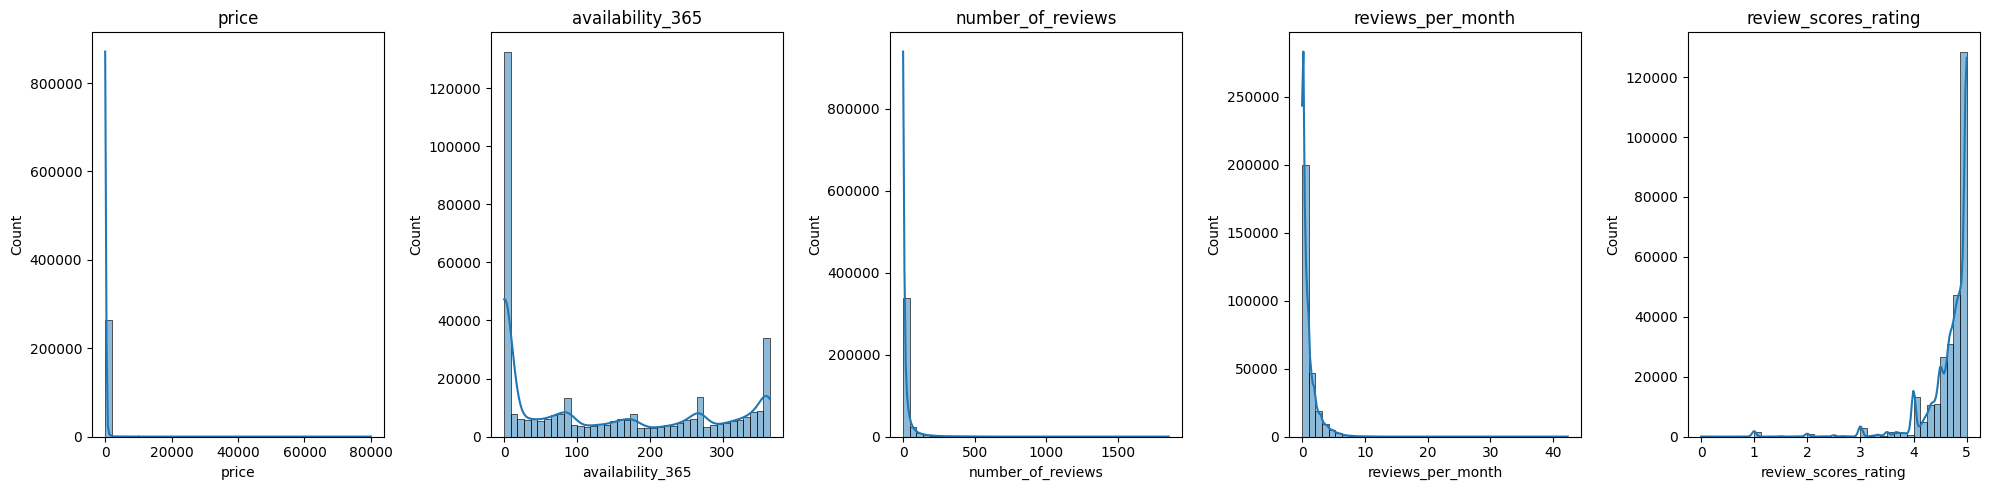

price: Skewness=66.66, Kurtosis=5726.44
availability_365: Skewness=0.47, Kurtosis=-1.35
number_of_reviews: Skewness=7.30, Kurtosis=108.29
reviews_per_month: Skewness=3.37, Kurtosis=29.93
review_scores_rating: Skewness=-3.87, Kurtosis=21.87


In [61]:
num_cols = ["price", "availability_365", "number_of_reviews", "reviews_per_month", "review_scores_rating"]
fig, axes = plt.subplots(1, len(num_cols), figsize=(20, 5))

for i, col in enumerate(num_cols):
    sns.histplot(London_airbnb[col].dropna(), kde=True, bins=40, ax=axes[i])
    axes[i].set_title(f"{col}")
plt.tight_layout()
plt.show()

for col in num_cols:
    data = London_airbnb[col].dropna()
    print(f"{col}: Skewness={skew(data):.2f}, Kurtosis={kurtosis(data):.2f}")


In [ ]:
num_cols = ["price", "availability_365", "number_of_reviews", "reviews_per_month", "review_scores_rating"]
#  stats for all numeric columns
desc_table = pd.concat(
    [London_airbnb[col].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]) for col in num_cols],
    axis=1
)
# Rename columns 
desc_table.columns = num_cols
print(desc_table)


               price  availability_365  number_of_reviews  reviews_per_month  review_scores_rating
count  263638.000000     382536.000000      382536.000000      284013.000000         284013.000000
mean      197.886995        134.946191          20.249841           0.985085              4.691753
std       756.811968        136.371516          48.342910           1.304710              0.479581
min         1.000000          0.000000           0.000000           0.000000              0.000000
25%        75.000000          0.000000           0.000000           0.150000              4.590000
50%       130.000000         88.000000           4.000000           0.520000              4.830000
75%       210.000000        269.000000          19.000000           1.270000              5.000000
90%       340.000000        351.000000          52.000000           2.560000              5.000000
95%       480.000000        364.000000          92.000000           3.640000              5.000000
99%      1

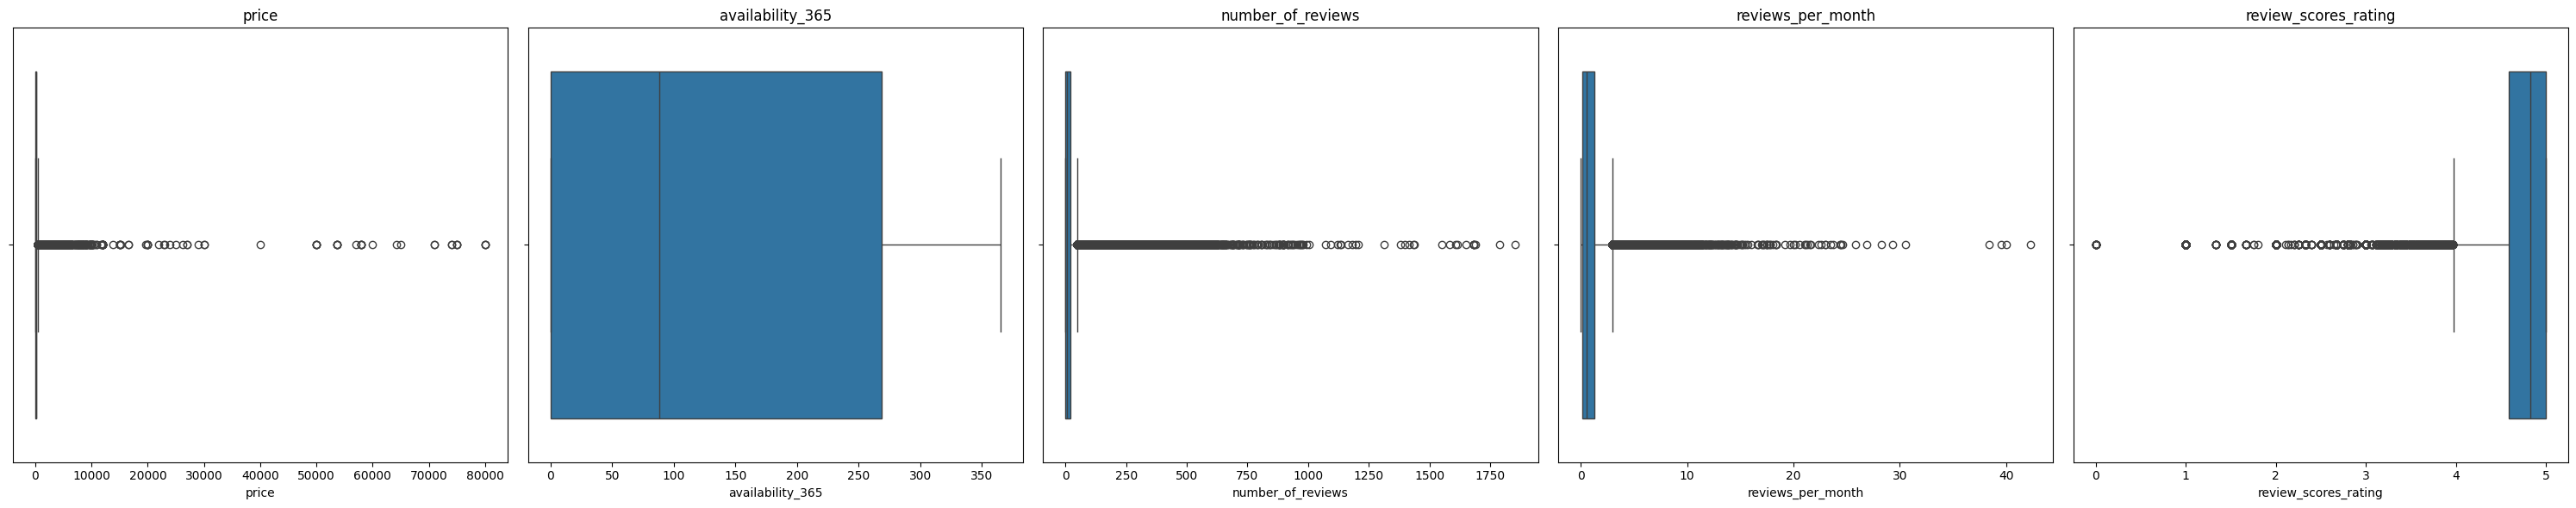

In [63]:
# Create subplots in a row
fig, axes = plt.subplots(1, len(num_cols), figsize=(30, 6))

for i, col in enumerate(num_cols):
    sns.boxplot(x=London_airbnb[col], ax=axes[i])
    axes[i].set_title(f"{col}")

plt.tight_layout()
plt.show()


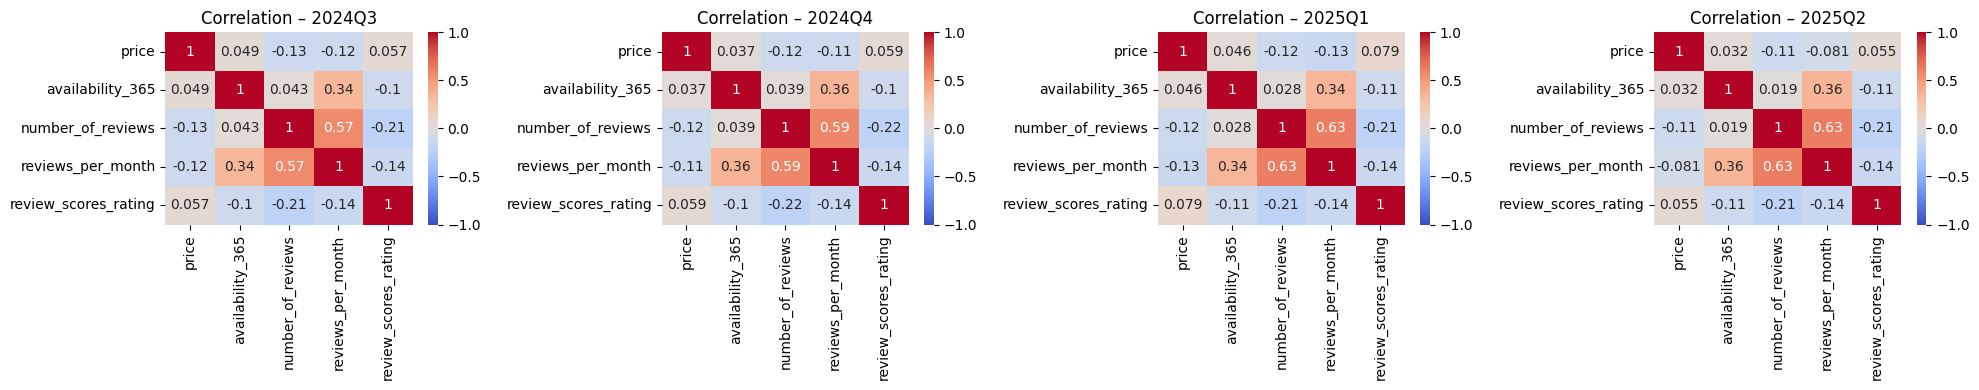

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ["price", "availability_365", "number_of_reviews", 
            "reviews_per_month", "review_scores_rating"]

quarters = London_airbnb["quarter"].unique()

# Create subplots: 1 row = number of quarters
fig, axes = plt.subplots(1, len(quarters), figsize=(5*len(quarters), 4))

for i, q in enumerate(quarters):
    subset = London_airbnb[London_airbnb["quarter"] == q]
    corr = subset[num_cols].corr(method="spearman")  # or "pearson"
    
    sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[i])
    axes[i].set_title(f"Correlation – {q}")

plt.tight_layout()
plt.show()


- Most numerical features are skewed, not normal → use median, percentiles, and non-parametric tests (Mann–Whitney U, Kruskal–Wallis) for hypothesis testing, not just means.
- Price & Reviews have extreme outliers → consider log transformation or capping.
- Availability_365 shows natural business segments (casual hosts vs. full-time).

## In the next notebook based on the missing value study and the feature engineered columns from this notebook, i'll derive KPIs and hypothesis